 **Made By :-  Ashu Kumar**

# <center>Movie Recommendation System</center>

The goal of this project is to build a Recommendation System that recommend movie. Here's a brief description of the columns:

+ rank: This column likely represents the ranking or order of the movie in the dataset.
+ id: An identifier for each movie.
+ name: The name or title of the movie.
+ year: The year the movie was released.
+ imdb_votes: The number of votes the movie has received on IMDb.
+ imdb_rating: The IMDb rating or score of the movie.
+ certificate: This column might contain information about the movie's content rating or certificate (e.g., G, PG-13, R).
+ duration: The duration or length of the movie, typically in minutes.
+ genre: The genre or category of the movie (e.g., action, drama, comedy).
+ cast_id: An identifier for the cast members of the movie.
+ cast_name: The names of the cast members.
+ director_id: An identifier for the movie's director.
+ director_name: The name of the movie's director.
+ writter_id: An identifier for the movie's writer(s).
+ writter_name: The name of the movie's writer(s).
+ img_link: A link or URL to an image associated with the movie (possibly a movie poster or promotional image).

**Import the required libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(color_codes=True)

**Load the dataset into jupyter notebook**

In [2]:
data = pd.read_csv('movies.csv')

In [3]:
data.head()

,rank,id,name,year,imbd_votes,imdb_rating,certificate,duration,genre,cast_id,cast_name,director_id,director_name,writter_name,writter_id,img_link
0,1,tt0111161,The Shawshank Redemption,1994,2601152,9.3,A,142,Drama,"nm0000209,nm0000151,nm0348409,nm0006669,nm0000...","Tim Robbins,Morgan Freeman,Bob Gunton,William ...",nm0001104,Frank Darabont,"Stephen King,Frank Darabont","nm0000175,nm0001104",https://m.media-amazon.com/images/M/MV5BMDFkYT...
1,2,tt0068646,The Godfather,1972,1796656,9.2,A,175,"Crime,Drama","nm0000008,nm0000199,nm0001001,nm0000473,nm0144...","Marlon Brando,Al Pacino,James Caan,Diane Keato...",nm0000338,Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola","nm0701374,nm0000338",https://m.media-amazon.com/images/M/MV5BM2MyNj...
2,3,tt0468569,The Dark Knight,2008,2572662,9.0,UA,152,"Action,Crime,Drama","nm0000288,nm0005132,nm0001173,nm0000323,nm0350...","Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",nm0634240,Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer","nm0634300,nm0634240,nm0275286",https://m.media-amazon.com/images/M/MV5BMTMxNT...
3,4,tt0071562,The Godfather Part II,1974,1237934,9.0,A,202,"Crime,Drama","nm0000199,nm0000134,nm0000380,nm0000473,nm0001...","Al Pacino,Robert De Niro,Robert Duvall,Diane K...",nm0000338,Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo","nm0000338,nm0701374",https://m.media-amazon.com/images/M/MV5BMWMwMG...
4,5,tt0050083,12 Angry Men,1957,768548,9.0,U,96,"Crime,Drama","nm0000020,nm0002011,nm0000842,nm0275835,nm0550...","Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",nm0001486,Sidney Lumet,Reginald Rose,nm0741627,https://m.media-amazon.com/images/M/MV5BMWU4N2...


**Retrieve the shape of the dataset, which indicates the number of rows and columns it contains.**

In [4]:
data.shape

(250, 16)

**Conduct an examination of the columns present in the dataset.**

In [5]:
data.columns

Index(['rank', 'id', 'name', 'year', 'imbd_votes', 'imdb_rating',
       'certificate', 'duration', 'genre', 'cast_id', 'cast_name',
       'director_id', 'director_name', 'writter_name', 'writter_id',
       'img_link'],
      dtype='object')

**Retrieve the information summary of the dataset, including details such as column names, data types, non-null counts, and memory usage.**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank           250 non-null    int64  
 1   id             250 non-null    object 
 2   name           250 non-null    object 
 3   year           250 non-null    int64  
 4   imbd_votes     250 non-null    int64  
 5   imdb_rating    250 non-null    float64
 6   certificate    249 non-null    object 
 7   duration       250 non-null    object 
 8   genre          250 non-null    object 
 9   cast_id        250 non-null    object 
 10  cast_name      250 non-null    object 
 11  director_id    250 non-null    object 
 12  director_name  250 non-null    object 
 13  writter_name   250 non-null    object 
 14  writter_id     250 non-null    object 
 15  img_link       250 non-null    object 
dtypes: float64(1), int64(3), object(12)
memory usage: 31.4+ KB


**Obtain the statistical summary of the dataset, the 'describe' function was employed.**

In [7]:
data.describe()

,rank,year,imbd_votes,imdb_rating
count,250.000000,250.000000,2.500000e+02,250.000000
mean,125.500000,1986.456000,6.204287e+05,8.311200
std,72.312977,25.214423,5.014117e+05,0.229445
min,1.000000,1921.000000,2.868000e+04,8.000000
25%,63.250000,1966.250000,2.099448e+05,8.100000
50%,125.500000,1994.000000,4.823150e+05,8.250000
75%,187.750000,2006.750000,9.356730e+05,8.400000
max,250.000000,2022.000000,2.601152e+06,9.300000


**Conduct an examination of the distinct values present in each column of the dataset.**

In [8]:
data.nunique()

rank             250
id               250
name             250
year              86
imbd_votes       250
imdb_rating       13
certificate       15
duration         104
genre            107
cast_id          250
cast_name        250
director_id      161
director_name    161
writter_name     233
writter_id       233
img_link         250
dtype: int64

**Perform an assessment of the presence of null values in the columns of the dataset.**

In [9]:
data.isnull().sum()

rank             0
id               0
name             0
year             0
imbd_votes       0
imdb_rating      0
certificate      1
duration         0
genre            0
cast_id          0
cast_name        0
director_id      0
director_name    0
writter_name     0
writter_id       0
img_link         0
dtype: int64

**Conducting an assessment to identify and examine duplicate values within the dataset.**

In [10]:
data.duplicated().sum()

0

## Data Visualization

**Determine the frequency or count of diagnoses categorized as 'M' (malignant) and 'B' (benign) types.**

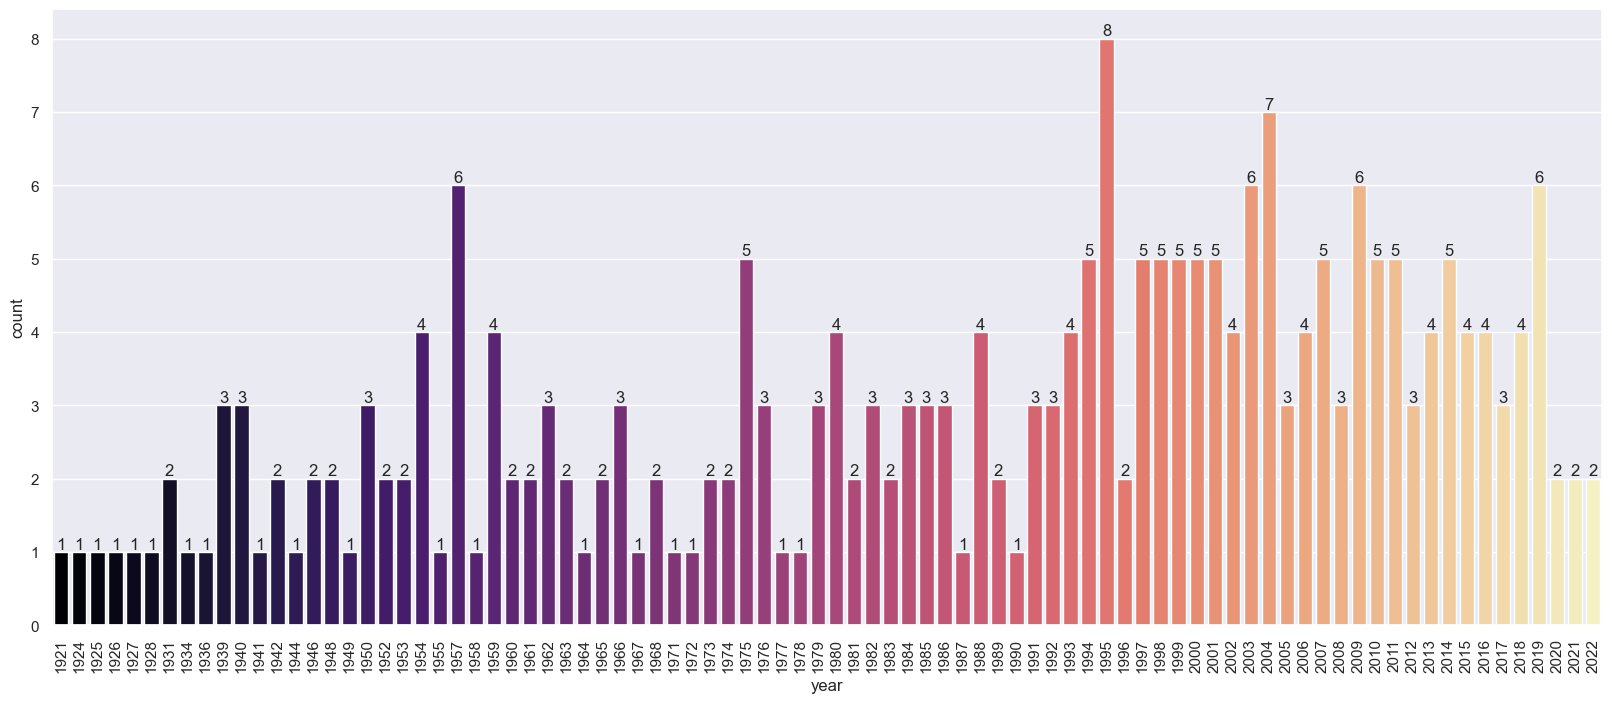

In [11]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x='year',data=data,palette='magma')
ax.bar_label(ax.containers[0])
plt.xticks(rotation =90)
plt.show()

**Generate a pairplot to visually analyze the relationships between various variables while considering the 'diagnosis' as a categorical factor.**

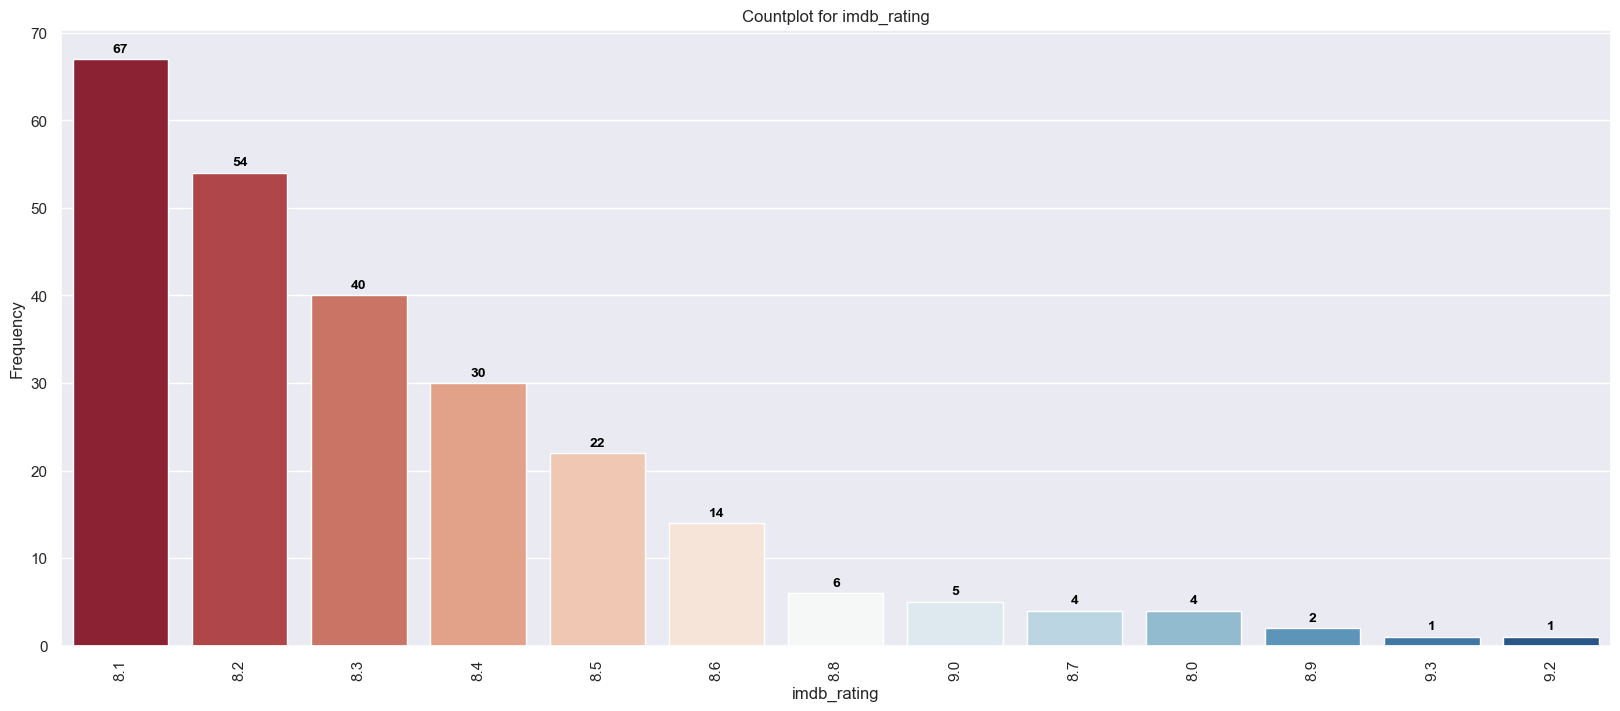

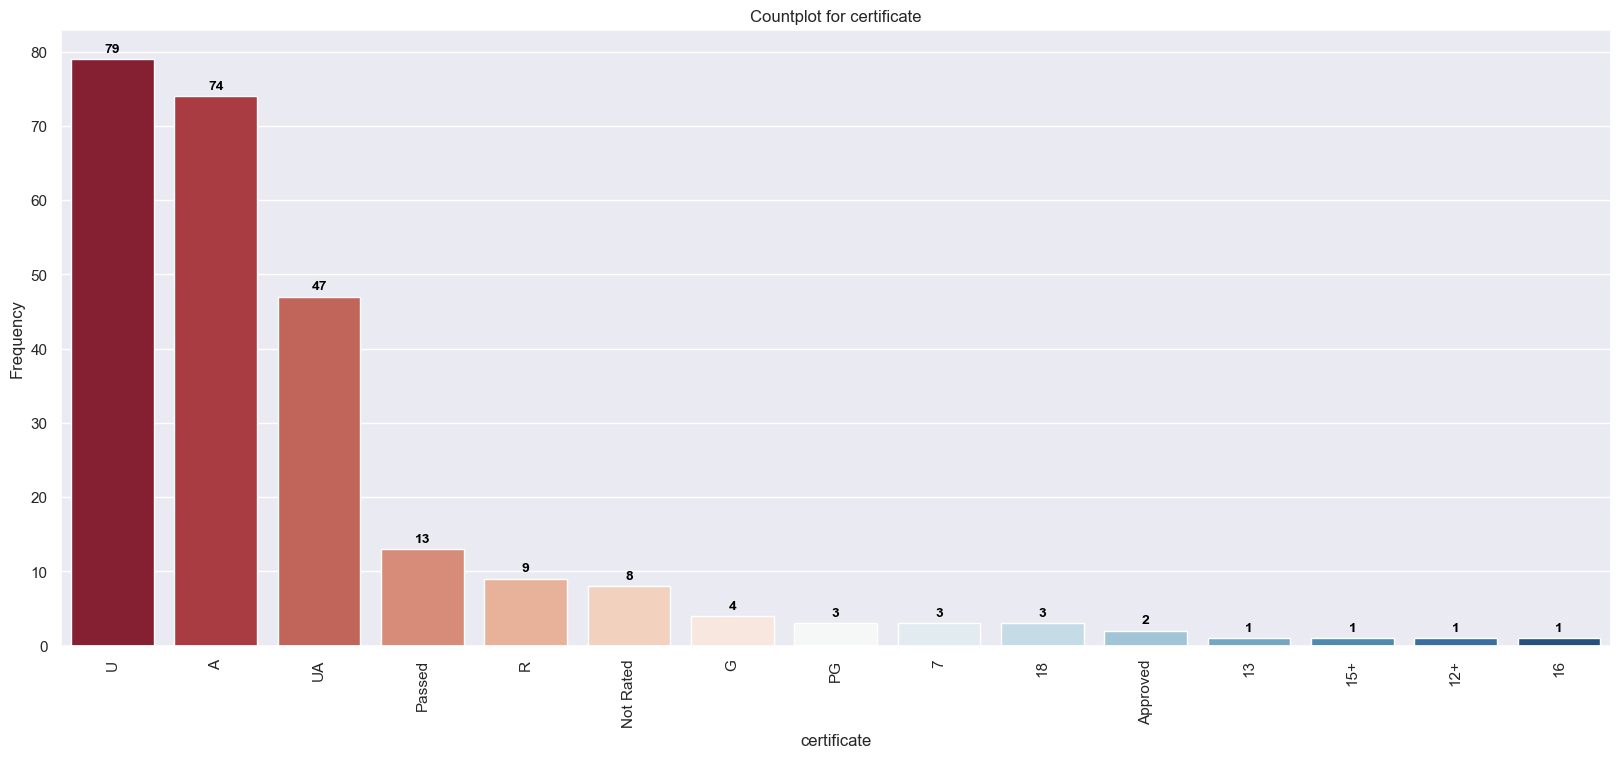

In [12]:
cat_var = ['imdb_rating','certificate']
for column in cat_var:
    plt.figure(figsize=(20, 8))
    category_counts = data[column].value_counts().sort_values(ascending=False)
    ax = sns.countplot(data=data, x=column, palette='RdBu', order=category_counts.index)
    ax.bar_label(ax.containers[0], fmt='%.0f', label_type='edge', fontsize=10, color='black', weight='bold', padding=3)
    plt.title(f'Countplot for {column}')
    plt.xticks(rotation=90)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

**Check relationship between Certificate and IMDB rating.**

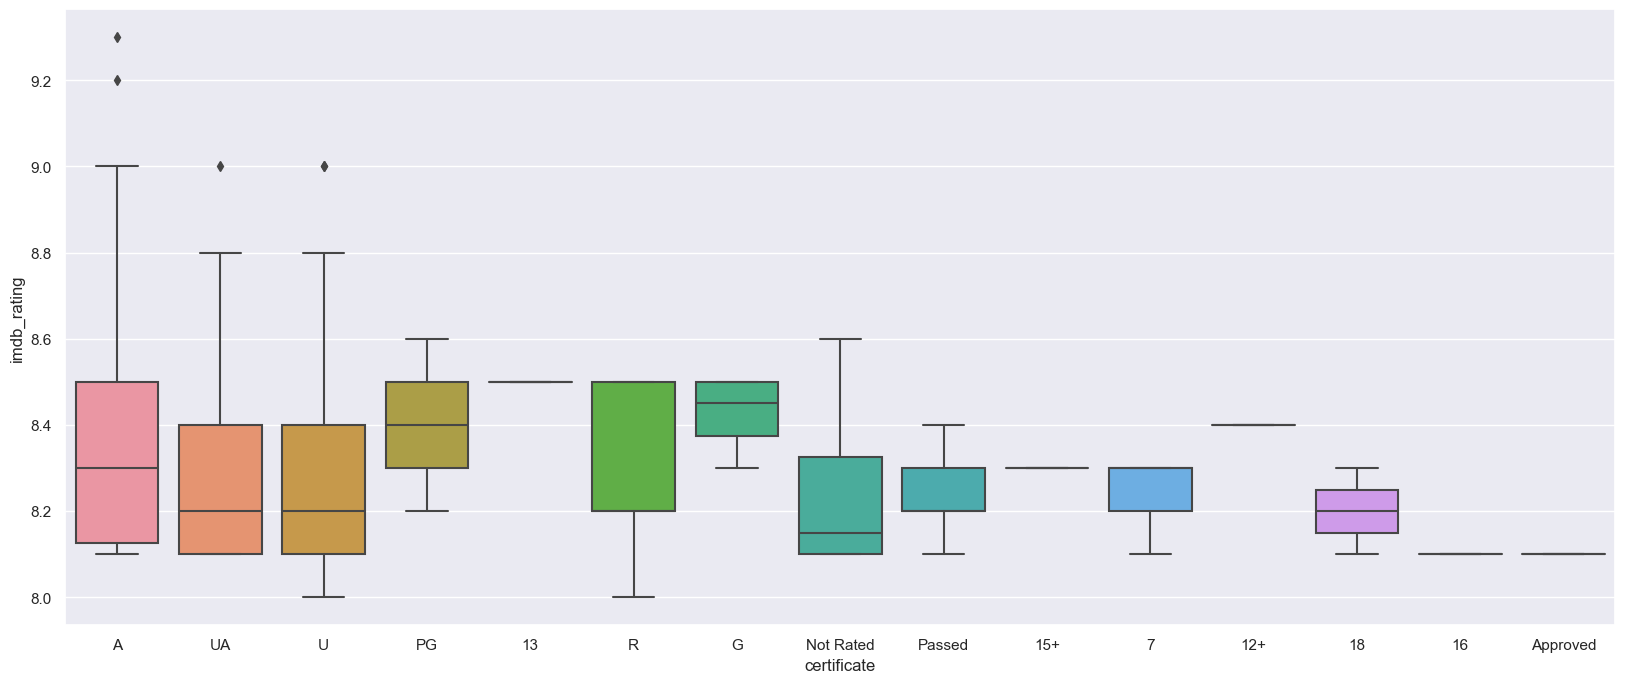

In [13]:
plt.figure(figsize=(20,8))
ax = sns.boxplot(data=data, x='certificate', y='imdb_rating')
plt.show()

Based on the visual representations provided, it is evident that movies with an 'A' certification tend to exhibit higher IMDB ratings.

## Feature engineering

**Create a content-based feature matrix**

In [14]:
tfidf = TfidfVectorizer(stop_words='english')
data['genre'] = data['genre'].fillna('')
data['director_name'] = data['director_name'].fillna('')
data['cast_name'] = data['cast_name'].fillna('')
data['features'] = data['genre'] + ' ' + data['director_name'] + ' ' + data['cast_name']
tfidf_matrix = tfidf.fit_transform(data['features'])

**Compute the cosine similarity between movies**

In [15]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

**Create a mapping of movie titles to their indices**

In [16]:
indices = pd.Series(data.index, index=data['name']).drop_duplicates()

**Function to get movie recommendations based on content similarity**

In [17]:
def get_movie_recommendations(movie_name, n=5):
    idx = indices[movie_name]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:n+1]  # Exclude the movie itself
    movie_indices = [i[0] for i in sim_scores]
    return data['name'].iloc[movie_indices]

**Get recommendations for a movie by providing its name**

In [18]:
movie_name = 'The Dark Knight'
recommendations = get_movie_recommendations(movie_name)
print(f"Top {len(recommendations)} movie recommendations for '{movie_name}':")
for i, movie in enumerate(recommendations):
    print(f"{i + 1}: {movie}")

Top 5 movie recommendations for 'The Dark Knight':
1: Batman Begins
2: The Dark Knight Rises
3: The Prestige
4: Inception
5: Léon
